In [10]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler  
import numpy as np


In [11]:
df=pd.read_csv("data1.csv")
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not disclosed,Other,Internship,Not specified,Not specified,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you: Your key responsibili...,What you will get from us Through being part o...,Full-time,Not Applicable,Not specified,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Other,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not disclosed,Other,Not specified,Not specified,Not specified,Other,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",Other,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review Manager LOCATION...,QUALIFICATIONS: RN license in the State of Tex...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f


In [12]:
df.isnull().sum()

title                   0
location                0
department              0
company_profile         0
description             2
requirements            9
benefits               22
employment_type         0
required_experience     0
required_education      0
industry                0
function                0
fraudulent              0
dtype: int64

### ⚠️ Class Imbalance Problem

We observe that over **95% of job postings are labeled as "not fraud"**, and only about **5% are labeled as "fraud"**.

This class imbalance causes several issues during model training:

- The model tends to **predict only the majority class** ("not fraud") to achieve high accuracy
- The **minority class ("fraud") is underrepresented**, making it hard for the model to learn its patterns
- Results in **high accuracy but poor recall and precision** for fraud detection
- Makes the model **biased and ineffective** for identifying actual fraudulent job posts

➡️ To address this, we apply **undersampling** to balance the dataset and ensure the model treats both classes fairly.


## We use undersampling (as for now) because
We donot want to overcomplicate the steps for now and have a working model in hand
<li>Start simple

<li>Avoid any risk of overfitting

<li>Test ideas quickly

In [14]:
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Define feature columns (X) and target column (Y)
X = df.drop(columns=['fraudulent'])   # All columns except the target
Y = df['fraudulent']                  # Target column: 1 = fake, 0 = real

In [15]:
# (Optional) Show original shape and class distribution
print("Before undersampling:")
print("X shape:", X.shape)
print("Class distribution:\n", Y.value_counts())

Before undersampling:
X shape: (17880, 12)
Class distribution:
 f    17014
t      866
Name: fraudulent, dtype: int64


In [16]:
#use undersampling method 
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, Y)

In [17]:
# Recombine resampled features into a single DataFrame
balanced_data = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.DataFrame(y_resampled, columns=["fraudulent"])
], axis=1)

In [18]:
# new shape and class distribution
print("\nAfter undersampling:")
print("Balanced shape:", balanced_data.shape)
print("New class distribution:\n", balanced_data['fraudulent'].value_counts())

df = balanced_data



After undersampling:
Balanced shape: (1732, 13)
New class distribution:
 f    866
t    866
Name: fraudulent, dtype: int64


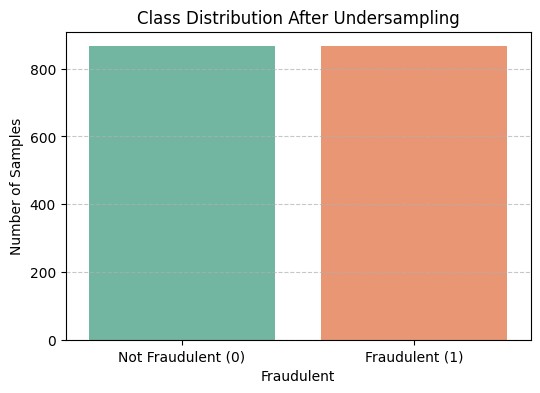

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# If your final DataFrame is named `data`
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='fraudulent', palette='Set2')

plt.title('Class Distribution After Undersampling')
plt.xlabel('Fraudulent')
plt.ylabel('Number of Samples')
plt.xticks([0, 1], ['Not Fraudulent (0)', 'Fraudulent (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
